<a href="https://colab.research.google.com/github/aryan0931/E-commerce-delivery/blob/main/E_Commerce_Product_Delivery_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-Commerce Product Delivery Prediction  

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df = pd.read_csv('/content/E_Commerce.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:

df.shape

(10999, 12)

In [ ]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

Dropping column ID because it is an index column

In [ ]:
df.drop(['ID'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

#### Customer Gender Distribution

Text(0.5, 1.0, 'Gender Distribution')

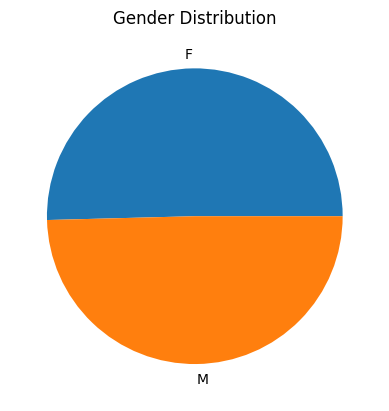

In [ ]:
plt.pie(df['Gender'].value_counts(),labels = ['F','M'])
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Discount Offered')

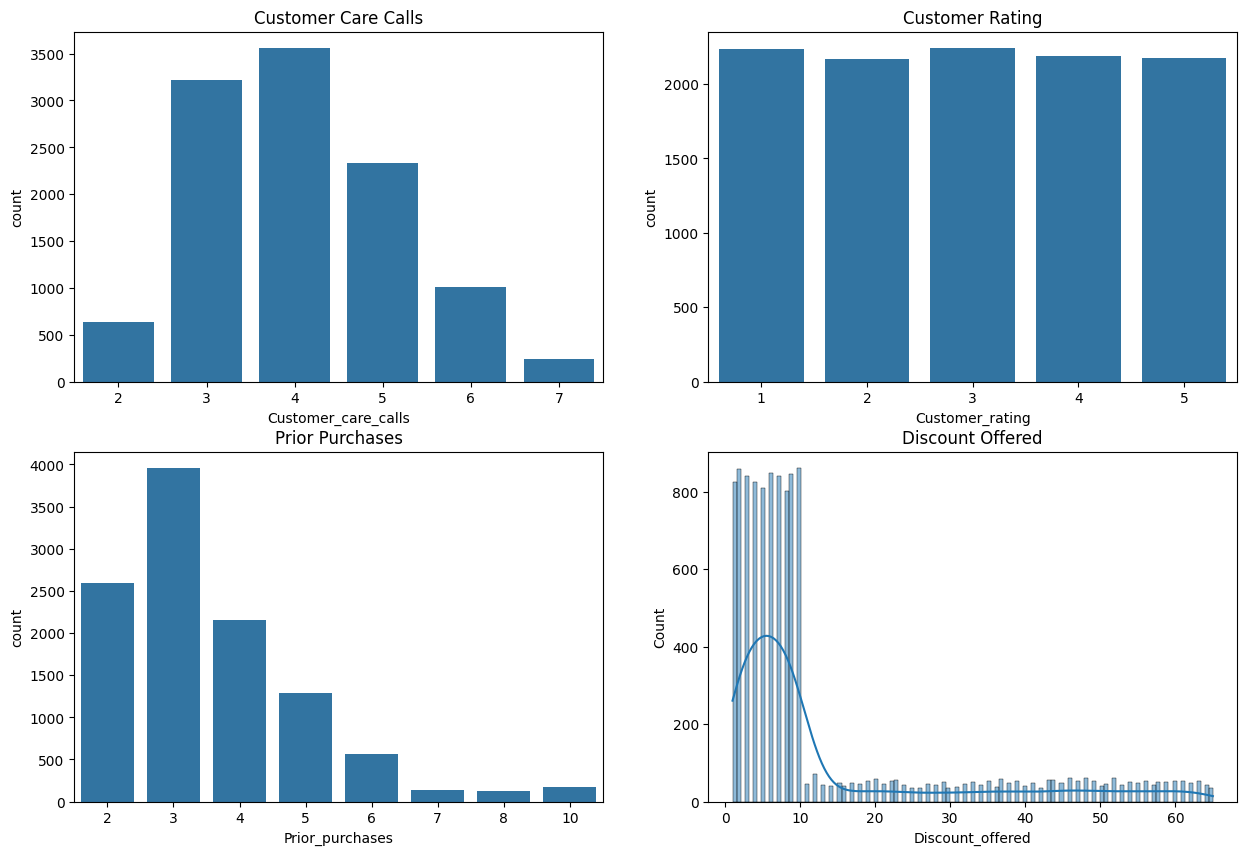

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0]).set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1]).set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0]).set_title('Prior Purchases')
sns.histplot(x = 'Discount_offered', data = df, ax=ax[1,1], kde = True).set_title('Discount Offered')

Text(0.5, 1.0, 'Discount Offered')

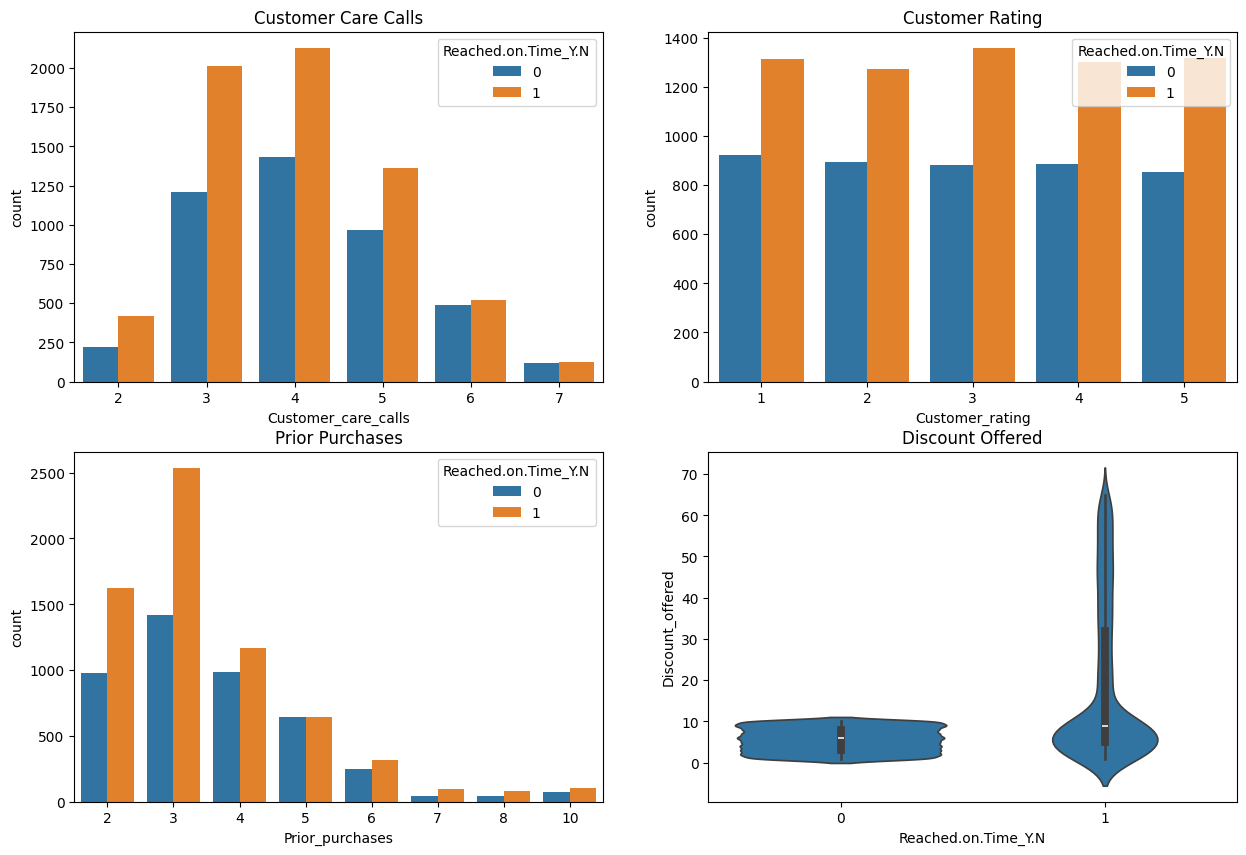

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0],hue = 'Reached.on.Time_Y.N').set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1],hue = 'Reached.on.Time_Y.N').set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0],hue = 'Reached.on.Time_Y.N').set_title('Prior Purchases')
sns.violinplot(x = 'Reached.on.Time_Y.N', y = 'Discount_offered' ,data = df, ax=ax[1,1]).set_title('Discount Offered')

It is important to understand the customer experience and respond to services provided by the E-Commerce company. The above graphs explain the relationship between customer experience and product delivery. The first graph is about the customer care calls and product delivery, where we that the difference in timely and late delivery of the product decreases with increase in the number of calls by the customer, which means that with the delay in product delivery the customer gets anxious about the product and calls the customer care. The second graph is about the customer rating and product delivery, where we can see that customers who  rating have higher count of products delivered on time.

The third graph is about the customer's prior purchase, which also shows that customers who have done more prior purchases have higher count of products delivered on time and this is the reason that they are purchasing again from the company. The fourth graph is about the discount offered on the product and product delivery, where we can see that products that have 0-10% discount have higher count of products delivered late, whereas products that have discount more than 10% have higher count of products delivered on time.

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Label encoding object
le = LabelEncoder()

#columns for label encoding
cols = ['Warehouse_block','Mode_of_Shipment','Product_importance', 'Gender']

#label encoding
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Warehouse_block [3 4 0 1 2]
Mode_of_Shipment [0 2 1]
Product_importance [1 2 0]
Gender [0 1]


<Axes: >

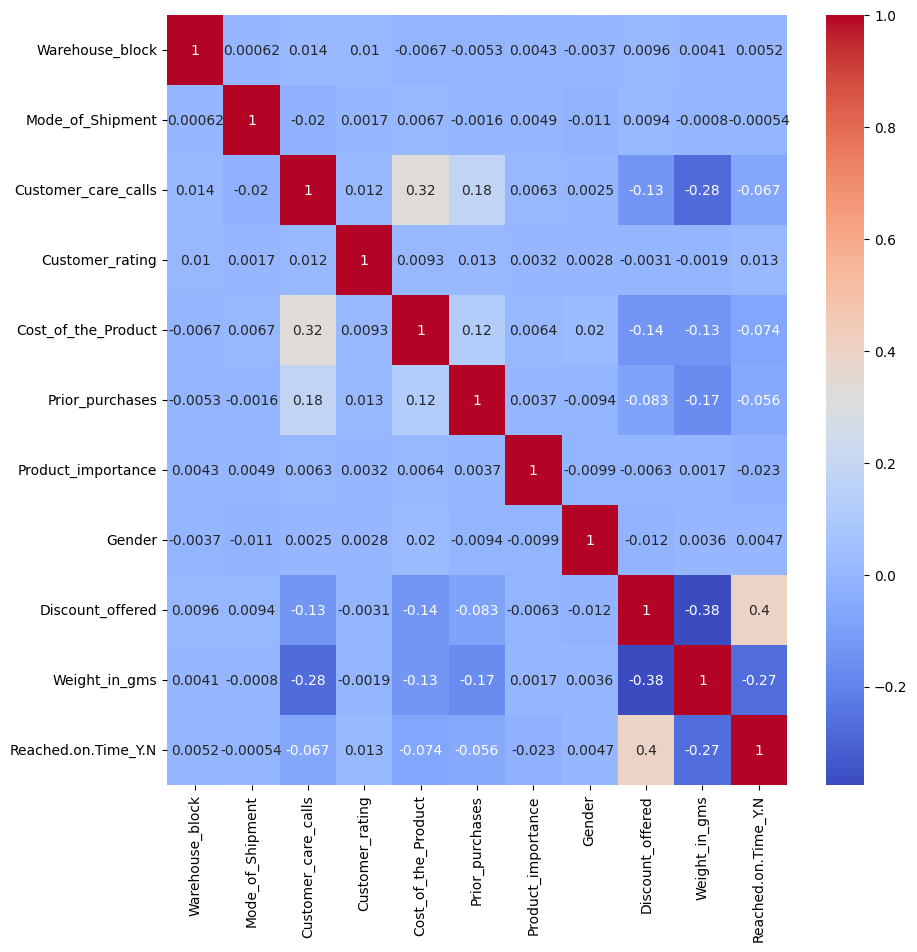

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In the correlation matrix heatmap, we can see that there is positive correlation between cost of product and number of customer care calls.

<Axes: xlabel='Customer_care_calls', ylabel='Cost_of_the_Product'>

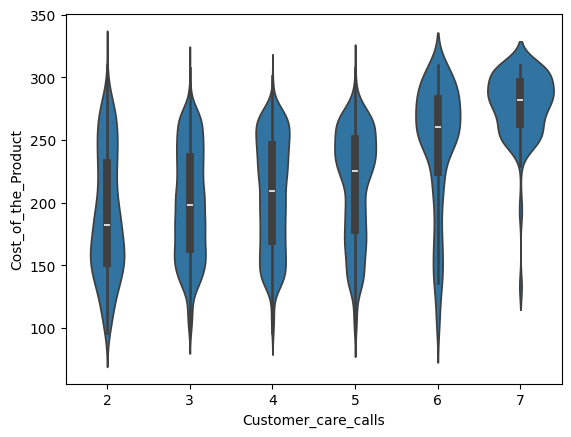

In [ ]:
sns.violinplot(x = 'Customer_care_calls', y = 'Cost_of_the_Product', data = df)

It is clear that customer are more concern regarding the delivery of the product when the cost of the product is high. This is the reason that they call the customer care to know the status of the product. So, it is important to make sure the delivery of the product is on time when the cost of the product is high.

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Reached.on.Time_Y.N', axis=1), df['Reached.on.Time_Y.N'], test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier Object
rfc = RandomForestClassifier()

In [ ]:
#Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Parameter grid
param_grid = {
    'max_depth': [4,8,12,16],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#GridSearchCV object
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 42}


In [ ]:
#Random Forest Classifier Object
rfc = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_leaf=8, min_samples_split=2, random_state=42)

#Fitting the model
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=8, random_state=42)

In [ ]:
#Training accuracy
print('Training accuracy: ', rfc.score(X_train, y_train))

Training accuracy:  0.7253096942834413


In [ ]:
#predicting the test set results
rfc_pred = rfc.predict(X_test)

#### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classifier Object
dtc = DecisionTreeClassifier()

In [ ]:
#Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
#Parameter grid
param_grid = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]}

#GridSearchCV object
grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


In [ ]:
#Decision Tree Classifier Object
dtc = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=6, min_samples_split=2, random_state=0, class_weight='balanced')

#Fitting the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=6,
                       random_state=0)

In [ ]:
#Training accuracy
print('Training accuracy: ', dtc.score(X_train, y_train))

Training accuracy:  0.6913285600636436


In [ ]:
#predicting the test set results
dtc_pred = dtc.predict(X_test)

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression Object
lr = LogisticRegression()

In [ ]:
#fitting the model
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Training accuracy
lr.score(X_train, y_train)

0.6356404136833731

In [ ]:
#predicting the test set results
lr_pred = lr.predict(X_test)

#### K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#KNN Classifier Object
knn = KNeighborsClassifier()

In [ ]:
#fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#training accuracy
knn.score(X_train, y_train)

0.7782702579838618

In [ ]:
#predicting the test set results
knn_pred = knn.predict(X_test)

## Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, r2_score, mean_squared_error

Text(0.5, 1.0, 'KNN Classifier')

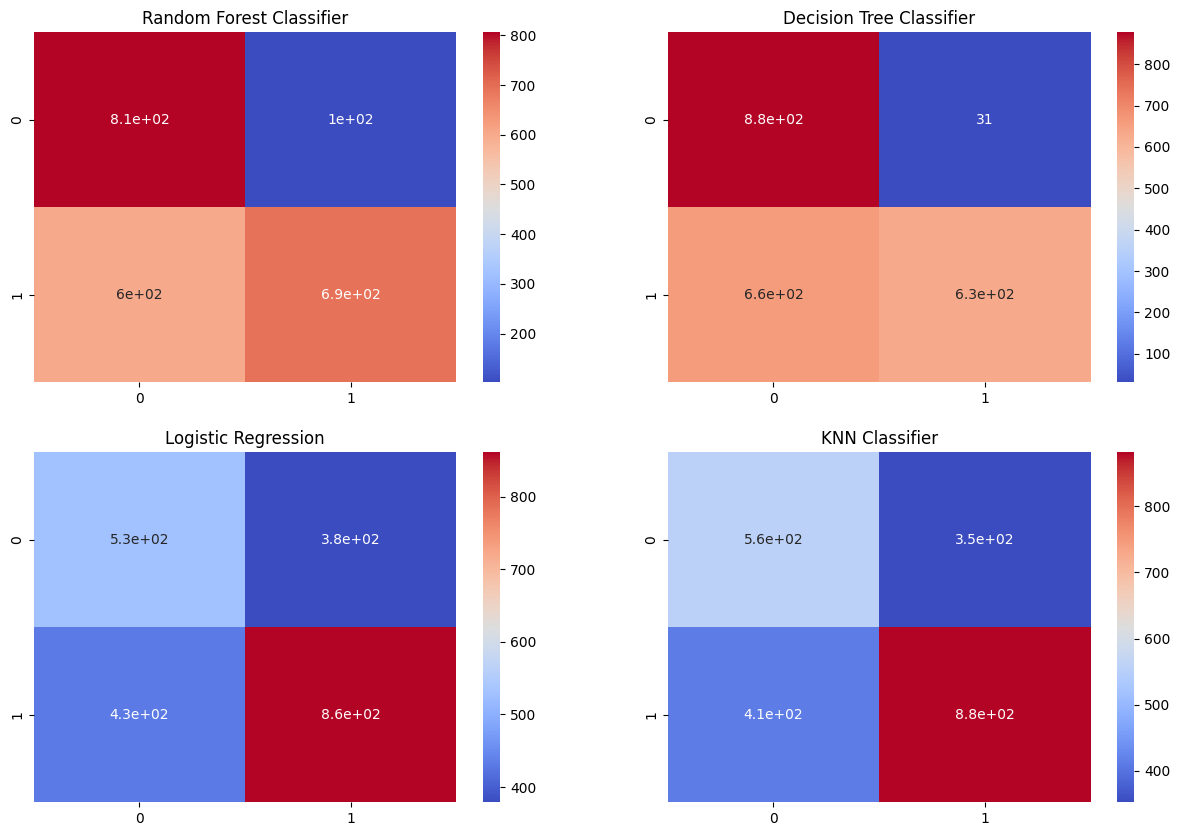

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='coolwarm', ax=ax[0,0]).set_title('Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test, dtc_pred), annot=True, cmap='coolwarm', ax=ax[0,1]).set_title('Decision Tree Classifier')
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap='coolwarm', ax=ax[1,0]).set_title('Logistic Regression')
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, cmap='coolwarm', ax=ax[1,1]).set_title('KNN Classifier')

In [ ]:
#classification report
print('Random Forest Classifier: \n', classification_report(y_test, rfc_pred))
print('Decision Tree Classifier: \n', classification_report(y_test, dtc_pred))
print('Logistic Regression: \n', classification_report(y_test, lr_pred))
print('KNN Classifier: \n', classification_report(y_test, knn_pred))

Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.57      0.89      0.70       908
           1       0.87      0.54      0.66      1292

    accuracy                           0.68      2200
   macro avg       0.72      0.71      0.68      2200
weighted avg       0.75      0.68      0.68      2200

Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       0.57      0.97      0.72       908
           1       0.95      0.49      0.65      1292

    accuracy                           0.69      2200
   macro avg       0.76      0.73      0.68      2200
weighted avg       0.80      0.69      0.68      2200

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.55      0.58      0.57       908
           1       0.69      0.67      0.68      1292

    accuracy                           0.63      2200
   macro avg       0.62      0.62      0.62      

##### Model Comparison

Text(0, 0.5, 'Accuracy')

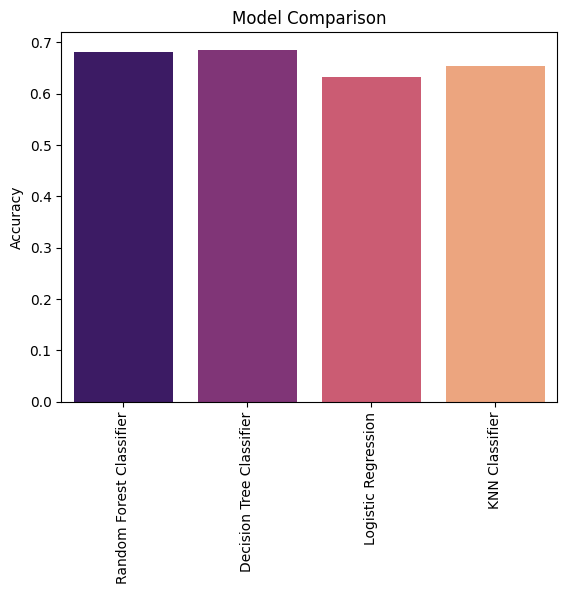

In [ ]:
models = ['Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression', 'KNN Classifier']
accuracy = [accuracy_score(y_test, rfc_pred), accuracy_score(y_test, dtc_pred), accuracy_score(y_test, lr_pred), accuracy_score(y_test, knn_pred)]
sns.barplot(x=models, y=accuracy, palette='magma').set_title('Model Comparison')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')

## Conclusion

The aim of the project was to predict whether the product from an e-commerce company will reach on time or not. This project also analyzes various factors that affect the delivery of the product as well as studies the customer behavior. From the exploratory data analysis, I found that the product weight and cost has an impact on the product delivery. Where product that weighs between 2500 - 3500 grams and having cost less than 250 dollars had higher rate of being delivered on time. Most of the products were shipped from warehouse F though ship, so it is quite possible that warehouse F is close to a seaport.

The customer's behaviour also help in predicting the timely delivery of the product. The more the customer calls, higher the chances the product delivery is delayed. Interestingly, the customers who have done more prior purchases have higher count of products delivered on time and this is the reason that they are purchasing again from the company. The products that have 0-10% discount have higher count of products delivered late, whereas products that have discount more than 10% have higher count of products delivered on time.

Coming to the machine learning models, the decision tree classifier as the highest accuracy among the other models, with accuracy of 69%. The random forest classifier and logistic regression had accuracy of 68% and 67% respectively. The K Nearest Neighbors had the lowest accuracy of 65%.